In [ ]:
# !pip3 install tensorflow

# !pip3 install opencv-python

# !pip3 install scikit-image

# !pip3 install pillow

# !pip3 install pixellib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from google.colab.patches import cv2_imshow
import cv2
datapath = ['1.png', '2.png', '3.png', '4.png']
oripath = ['ori1.jpg', 'ori2.jpg', 'ori3.jpg', 'ori4.jpg']
path ='in1.png'
inpath = 'ori1in.jpg'
img = cv2.imread(path)
inp = cv2.imread(inpath)
dataImg = []
for p in datapath:
  dataImg.append(cv2.imread(p))


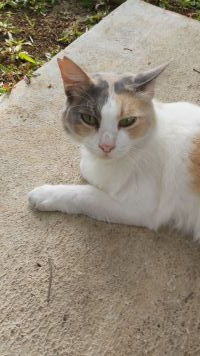

In [ ]:
cv2_imshow(inp)

In [ ]:
def countAvg(im):
  (x, y) = im.shape
  im = im.reshape(-1)
  px = [a for a in im if a>0]
  return np.average(px)

def avgChannels(im, mask):
  imgR = im[:,:,0]
  imgG = im[:,:,1]
  imgB = im[:,:,2]

  segR = cv2.bitwise_and(imgR, mask)
  segG = cv2.bitwise_and(imgG, mask)
  segB = cv2.bitwise_and(imgB, mask)

  avgR = countAvg(segR)
  avgG = countAvg(segG)
  avgB = countAvg(segB)
  return [avgR, avgG, avgB]

def createMask(im):
  img_rgb=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
  ret,thresh1 = cv2.threshold(img_gray,1,255,cv2.THRESH_BINARY)
  return thresh1

dataAvg = []

for im in dataImg:
  mask = createMask(im)
  dataAvg.append(avgChannels(im, mask))

In [ ]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

In [ ]:
ret,thresh1 = cv2.threshold(img_gray,1,255,cv2.THRESH_BINARY)

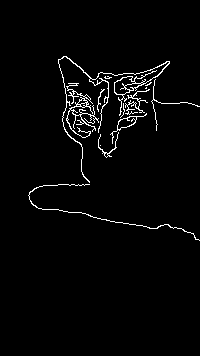

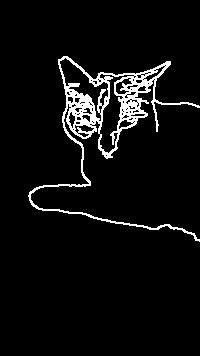

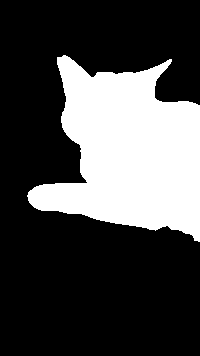

-1

In [ ]:
edged=cv2.Canny(img_gray,30,200)

kernel = np.ones((2,2), np.uint8)

edged1 = cv2.dilate(edged, kernel, iterations=1)
cv2_imshow(edged)
cv2_imshow(edged1)
cv2_imshow(thresh1)
cv2.waitKey(0)

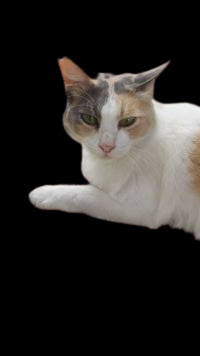

In [ ]:
cv2_imshow(img)

In [ ]:
for d in dataAvg:
  print(d)

[138.38149688149687, 155.6536005939124, 164.82776540460281]
[88.0281853640416, 93.90175047592516, 108.2812833728003]
[85.37237557507319, 92.42891198427469, 98.73364837738374]
[68.75928944853561, 72.01167817640784, 80.88568861939251]


In [ ]:
a = avgChannels(img, thresh1)
a

[130.4451228592703, 138.8338049143708, 147.11382477041448]

In [ ]:
# euclidean distance
def distance(avg1, avg2):
  point1 = np.array(avg1)
  point2 = np.array(avg2)
  
  dist = np.linalg.norm(point1-point2)
  return dist

[25.684143982499148, 72.97980798776466, 80.78123608499408, 112.50113192052602]
0


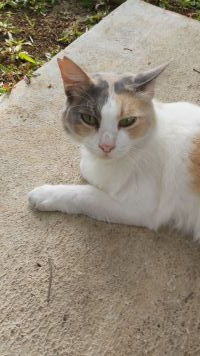

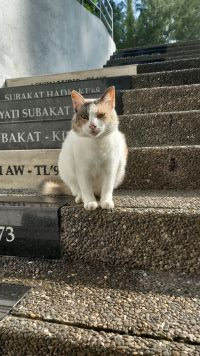

In [ ]:
# calculate minimum distance to images in database
dists = []
for d in dataAvg:
  dists.append(distance(a,d))
print(dists)

minIdx = dists.index(min(dists))
print(minIdx)

res = cv2.imread(oripath[minIdx])
cv2_imshow(inp)
cv2_imshow(res)

# New Section